## 모델 restore

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from keras.models import load_model

model = load_model('model/model_cifar10.h5')

Using TensorFlow backend.
W1026 12:30:47.265253 14464 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4070: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1026 12:30:51.468230 14464 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



In [3]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)       

## 모델 prediction

In [4]:
#pip install opencv-python

import cv2
import matplotlib.pyplot as plt
#img = cv2.imread('./data/dog.jpg', cv2.IMREAD_COLOR)
img = cv2.imread('./data/automobile.jpg', cv2.IMREAD_COLOR)

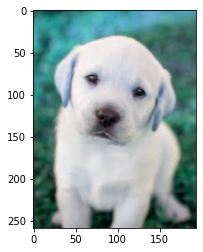

In [5]:
plt.imshow(img, interpolation="bicubic")
plt.show()

In [6]:
img.shape

(259, 194, 3)

In [7]:
new_img = cv2.resize(img, dsize=(32, 32))

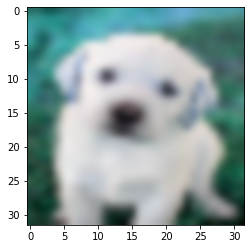

In [8]:
plt.imshow(new_img, interpolation="bicubic")
plt.show()

In [9]:
new_img.shape

(32, 32, 3)

In [10]:
new_img = new_img.reshape(1, 32, 32, 3)

In [11]:
# 스캐일링 추가 필요
result = model.predict_classes(new_img)

In [12]:
label_name = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck',
}

In [13]:
label_name.get(result[0])

'dog'

In [14]:
result

array([5], dtype=int64)